In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

from hmmlearn import hmm
from ts.plot import Plot
from ts.data.dataset import AmazonStockPrice

%matplotlib inline

In [2]:
stock_df = AmazonStockPrice.loadData('/Users/ahmed/Downloads/Datasets/amazonStockPrice')
stock_df = stock_df.loc[stock_df['High'] <= 50]
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
2904,2008-11-28,44.029999,44.099998,42.220001,42.700001,42.700001,3481000
2905,2008-12-01,42.000000,43.259998,40.380001,40.470001,40.470001,11178900
2906,2008-12-02,41.389999,41.709999,38.820000,41.189999,41.189999,8713700
2907,2008-12-03,40.160000,45.880001,40.049999,45.209999,45.209999,15675600


In [3]:
column_names = list(stock_df.columns)

for column_name in column_names:
    print(column_name, stock_df[column_name].dtype)

Date datetime64[ns]
Open float64
High float64
Low float64
Close float64
Adj Close float64
Volume int64


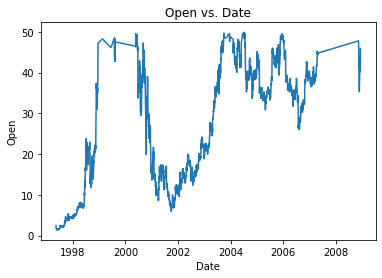

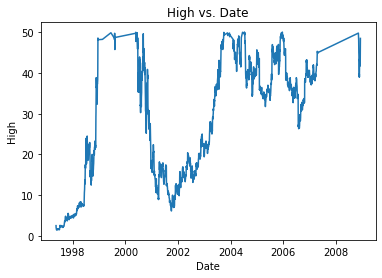

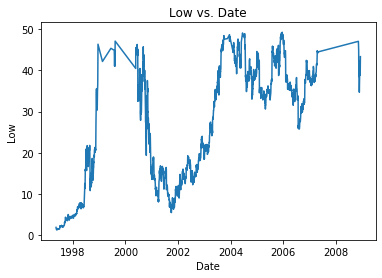

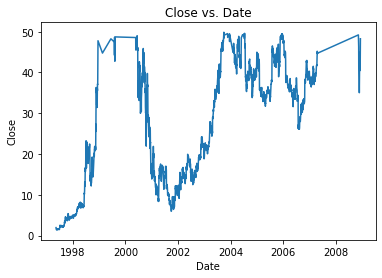

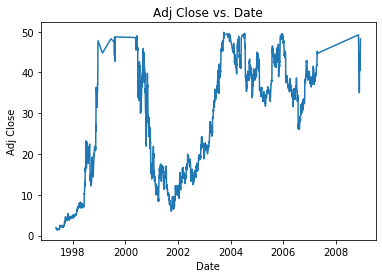

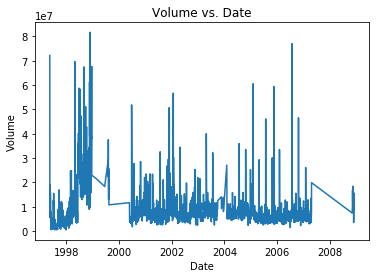

In [4]:
# Plotting the columns with respect to time

for column_name in column_names:
    if column_name == 'Date':
        continue
        
    plt.plot(stock_df['Date'].to_numpy(), stock_df[column_name].to_numpy())
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(f'{column_name} vs. Date')
    plt.show()

In [5]:
# Since volume data doesn't seem to follow a pattern, we
# may discard it. We also discard the date.

stock_df = stock_df.drop(columns=['Date', 'Volume', 'Adj Close'])

In [84]:
model = hmm.GaussianHMM(
    n_components=6,
    covariance_type='full',
    n_iter=500,
    tol=0,
    verbose=False
)

In [116]:
model = hmm.GMMHMM(
    n_components=6,
    n_mix=4,
    covariance_type='full',
    n_iter=500,
    tol=0,
    verbose=False
)

In [120]:
X = stock_df.to_numpy()

X.shape

(2053, 4)

In [118]:
_ = model.fit(X)

True

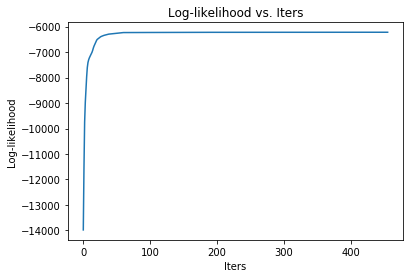

In [119]:
plt.plot(model.monitor_.history, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
model.monitor_.converged

In [121]:
minObsValue = 0
maxObsValue = 50
numValues = 10

obsDiscrete = np.linspace(minObsValue, maxObsValue, num=numValues)

In [122]:
print(obsDiscrete)

[ 0.          5.55555556 11.11111111 16.66666667 22.22222222 27.77777778
 33.33333333 38.88888889 44.44444444 50.        ]


In [128]:
d = 100
startPred = 1500
numPred = 1

In [129]:
pred = []
logLikelihoods = []

for i in tqdm.tqdm(range(startPred + d, startPred + d + numPred)):
    x = np.concatenate((X[i - d : i, :], np.zeros((1, 4))), axis=0)
    chosenObs = None
    maxLogLikelihood = None
    
    for obs0 in obsDiscrete:
        x[d, 0] = obs0
        for obs1 in obsDiscrete:
            x[d, 1] = obs1
            for obs2 in obsDiscrete:
                x[d, 2] = obs2
                for obs3 in obsDiscrete:
                    x[d, 3] = obs3
                    currLogLikelihood = model.score(x)
                    
                    print(x[d], currLogLikelihood)
                    
                    if maxLogLikelihood is None or currLogLikelihood > maxLogLikelihood:
                        chosenObs = x[d].copy()
                        maxLogLikelihood = currLogLikelihood
            
    pred.append(chosenObs)
    logLikelihoods.append(maxLogLikelihood)
    
pred = np.array(pred)
logLikelihoods = np.array(logLikelihoods)

  0%|          | 0/1 [00:00<?, ?it/s]

[0. 0. 0. 0.] -336.64322579186756
[0.         0.         0.         5.55555556] -357.46007241475655
[ 0.          0.          0.         11.11111111] -399.8749127774041
[ 0.          0.          0.         16.66666667] -474.607160525104
[ 0.          0.          0.         22.22222222] -581.6568156578562
[ 0.          0.          0.         27.77777778] -714.4281766381247
[ 0.          0.          0.         33.33333333] -829.9849686728501
[ 0.          0.          0.         38.88888889] -969.0586586536815
[ 0.          0.          0.         44.44444444] -1131.650613742874
[ 0.  0.  0. 50.] -1317.760833940427
[0.         0.         5.55555556 0.        ] -404.77449584070513
[0.         0.         5.55555556 5.55555556] -361.62894641643555
[ 0.          0.          5.55555556 11.11111111] -422.44828295783054
[ 0.          0.          5.55555556 16.66666667] -479.76128759397176
[ 0.          0.          5.55555556 22.22222222] -569.3916996151654
[ 0.          0.          5.55555556 27.

[ 0.          5.55555556 16.66666667 11.11111111] -523.7023817680472
[ 0.          5.55555556 16.66666667 16.66666667] -518.8924300461268
[ 0.          5.55555556 16.66666667 22.22222222] -537.6007434325671
[ 0.          5.55555556 16.66666667 27.77777778] -579.8273219273682
[ 0.          5.55555556 16.66666667 33.33333333] -645.5721655305298
[ 0.          5.55555556 16.66666667 38.88888889] -734.835274242052
[ 0.          5.55555556 16.66666667 44.44444444] -847.6166480619352
[ 0.          5.55555556 16.66666667 50.        ] -983.9162869901791
[ 0.          5.55555556 22.22222222  0.        ] -672.2265121430881
[ 0.          5.55555556 22.22222222  5.55555556] -613.9835496493995
[ 0.          5.55555556 22.22222222 11.11111111] -579.2588522640715
[ 0.          5.55555556 22.22222222 16.66666667] -568.0524199871043
[ 0.          5.55555556 22.22222222 22.22222222] -580.3642528184976
[ 0.          5.55555556 22.22222222 27.77777778] -616.1943507582516
[ 0.          5.55555556 22.2222222

[ 0.         11.11111111 33.33333333 22.22222222] -690.5021824902376
[ 0.         11.11111111 33.33333333 27.77777778] -682.9181797157294
[ 0.         11.11111111 33.33333333 33.33333333] -698.8524420495819
[ 0.         11.11111111 33.33333333 38.88888889] -738.3049694917952
[ 0.         11.11111111 33.33333333 44.44444444] -801.2757620423693
[ 0.         11.11111111 33.33333333 50.        ] -887.7648197013038
[ 0.         11.11111111 38.88888889  0.        ] -1080.4653463846844
[ 0.         11.11111111 38.88888889  5.55555556] -972.4118026216865
[ 0.         11.11111111 38.88888889 11.11111111] -887.8765239670495
[ 0.         11.11111111 38.88888889 16.66666667] -826.859510420773
[ 0.         11.11111111 38.88888889 22.22222222] -789.3607619828572
[ 0.         11.11111111 38.88888889 27.77777778] -775.3802786533022
[ 0.         11.11111111 38.88888889 33.33333333] -784.9180604321077
[ 0.         11.11111111 38.88888889 38.88888889] -817.974107319274
[ 0.         11.11111111 38.8888888

[ 0.         16.66666667 50.         27.77777778] -1023.7021171654633
[ 0.         16.66666667 50.         33.33333333] -989.8257982300067
[ 0.         16.66666667 50.         38.88888889] -979.4677444029107
[ 0.         16.66666667 50.         44.44444444] -992.6279556841755
[ 0.         16.66666667 50.         50.        ] -1029.3064320738008
[ 0.         22.22222222  0.          0.        ] -642.378856034314
[ 0.         22.22222222  0.          5.55555556] -557.5417273440819
[ 0.         22.22222222  0.         11.11111111] -505.02200603890196
[ 0.         22.22222222  0.         16.66666667] -484.81969211877447
[ 0.         22.22222222  0.         22.22222222] -496.93478558369935
[ 0.         22.22222222  0.         27.77777778] -522.2474798122096
[ 0.         22.22222222  0.         33.33333333] -515.3183462729772
[ 0.         22.22222222  0.         38.88888889] -531.9074778371354
[ 0.         22.22222222  0.         44.44444444] -572.0148745096542
[ 0.         22.22222222  0.  

[ 0.         27.77777778 16.66666667  0.        ] -1020.1471799324868
[ 0.         27.77777778 16.66666667  5.55555556] -859.3186814906217
[ 0.         27.77777778 16.66666667 11.11111111] -730.8075904338089
[ 0.         27.77777778 16.66666667 16.66666667] -634.6139067620485
[ 0.         27.77777778 16.66666667 22.22222222] -570.7376304753406
[ 0.         27.77777778 16.66666667 27.77777778] -539.1787615736849
[ 0.         27.77777778 16.66666667 33.33333333] -539.9373000570818
[ 0.         27.77777778 16.66666667 38.88888889] -572.9179120858554
[ 0.         27.77777778 16.66666667 44.44444444] -565.6123861939345
[ 0.         27.77777778 16.66666667 50.        ] -579.4274667055048
[ 0.         27.77777778 22.22222222  0.        ] -1201.106442676499
[ 0.         27.77777778 22.22222222  5.55555556] -1022.8587011230752
[ 0.         27.77777778 22.22222222 11.11111111] -876.9283669547037
[ 0.         27.77777778 22.22222222 16.66666667] -763.3154401713847
[ 0.         27.77777778 22.2222

[ 0.         33.33333333 33.33333333 44.44444444] -796.902977539587
[ 0.         33.33333333 33.33333333 50.        ] -760.9074767818481
[ 0.         33.33333333 38.88888889  0.        ] -2068.673122664812
[ 0.         33.33333333 38.88888889  5.55555556] -1838.1350204851406
[ 0.         33.33333333 38.88888889 11.11111111] -1631.11518341383
[ 0.         33.33333333 38.88888889 16.66666667] -1447.6136114508804
[ 0.         33.33333333 38.88888889 22.22222222] -1287.6303045962911
[ 0.         33.33333333 38.88888889 27.77777778] -1151.1652628500626
[ 0.         33.33333333 38.88888889 33.33333333] -1038.2184862121949
[ 0.         33.33333333 38.88888889 38.88888889] -948.7899746826877
[ 0.         33.33333333 38.88888889 44.44444444] -882.8797282615412
[ 0.         33.33333333 38.88888889 50.        ] -840.4877469487556
[ 0.         33.33333333 44.44444444  0.        ] -2223.4614000752445
[ 0.         33.33333333 44.44444444  5.55555556] -1986.5268173405263
[ 0.         33.33333333 44.4

[ 0.         44.44444444  0.         33.33333333] -1085.19328920536
[ 0.         44.44444444  0.         38.88888889] -1052.8330850871955
[ 0.         44.44444444  0.         44.44444444] -970.4559233430407
[ 0.         44.44444444  0.         50.        ] -911.5970267072469
[ 0.         44.44444444  5.55555556  0.        ] -1650.3508063463955
[ 0.         44.44444444  5.55555556  5.55555556] -1453.1598728767772
[ 0.         44.44444444  5.55555556 11.11111111] -1288.2863467922114
[ 0.         44.44444444  5.55555556 16.66666667] -1155.730228092698
[ 0.         44.44444444  5.55555556 22.22222222] -1055.4915167782367
[ 0.         44.44444444  5.55555556 27.77777778] -987.5702128488279
[ 0.         44.44444444  5.55555556 33.33333333] -951.9663163044713
[ 0.         44.44444444  5.55555556 38.88888889] -948.6798271451673
[ 0.         44.44444444  5.55555556 44.44444444] -956.946627300179
[ 0.         44.44444444  5.55555556 50.        ] -891.6912501102981
[ 0.         44.44444444 11.111

[ 0.         50.         22.22222222 27.77777778] -1208.2225356808408
[ 0.         50.         22.22222222 33.33333333] -1096.6272693848516
[ 0.         50.         22.22222222 38.88888889] -1017.3494104739148
[ 0.         50.         22.22222222 44.44444444] -970.3889589480302
[ 0.         50.         22.22222222 50.        ] -955.745914807198
[ 0.         50.         27.77777778  0.        ] -2447.9823930255093
[ 0.         50.         27.77777778  5.55555556] -2157.3808466926994
[ 0.         50.         27.77777778 11.11111111] -1899.0967077449425
[ 0.         50.         27.77777778 16.66666667] -1673.1299761822372
[ 0.         50.         27.77777778 22.22222222] -1479.480652004584
[ 0.         50.         27.77777778 27.77777778] -1318.148735211984
[ 0.         50.         27.77777778 33.33333333] -1189.1342258044363
[ 0.         50.         27.77777778 38.88888889] -1092.4371237819405
[ 0.         50.         27.77777778 44.44444444] -1028.0574291444973
[ 0.         50.         

[ 5.55555556  0.         44.44444444 22.22222222] -961.6152030239989
[ 5.55555556  0.         44.44444444 27.77777778] -1018.4884667650824
[ 5.55555556  0.         44.44444444 33.33333333] -1098.8799956145263
[ 5.55555556  0.         44.44444444 38.88888889] -1202.789789572331
[ 5.55555556  0.         44.44444444 44.44444444] -1330.2178486384967
[ 5.55555556  0.         44.44444444 50.        ] -1481.164172813023
[ 5.55555556  0.         50.          0.        ] -1108.7528336564176
[ 5.55555556  0.         50.          5.55555556] -1065.1565564090113
[ 5.55555556  0.         50.         11.11111111] -1045.0785442699657
[ 5.55555556  0.         50.         16.66666667] -1048.5187972392807
[ 5.55555556  0.         50.         22.22222222] -1075.4773153169567
[ 5.55555556  0.         50.         27.77777778] -1125.954098502993
[ 5.55555556  0.         50.         33.33333333] -1199.94914679739
[ 5.55555556  0.         50.         38.88888889] -1297.462460200148
[ 5.55555556  0.         50

[ 5.55555556 11.11111111 11.11111111  5.55555556] -391.9879571632214
[ 5.55555556 11.11111111 11.11111111 11.11111111] -362.15326540714796
[ 5.55555556 11.11111111 11.11111111 16.66666667] -364.63702818334434
[ 5.55555556 11.11111111 11.11111111 22.22222222] -399.4376747709844
[ 5.55555556 11.11111111 11.11111111 27.77777778] -466.55559320120756
[ 5.55555556 11.11111111 11.11111111 33.33333333] -532.9900194830884
[ 5.55555556 11.11111111 11.11111111 38.88888889] -614.0364175628382
[ 5.55555556 11.11111111 11.11111111 44.44444444] -718.6010807509485
[ 5.55555556 11.11111111 11.11111111 50.        ] -846.6840090474197
[ 5.55555556 11.11111111 16.66666667  0.        ] -575.978190376469
[ 5.55555556 11.11111111 16.66666667  5.55555556] -496.4176899278978
[ 5.55555556 11.11111111 16.66666667 11.11111111] -449.1642786545706
[ 5.55555556 11.11111111 16.66666667 16.66666667] -434.22827468866564
[ 5.55555556 11.11111111 16.66666667 22.22222222] -451.5950634464873
[ 5.55555556 11.11111111 16.666

[ 5.55555556 16.66666667 33.33333333  0.        ] -927.5776745995083
[ 5.55555556 16.66666667 33.33333333  5.55555556] -811.3074202047378
[ 5.55555556 16.66666667 33.33333333 11.11111111] -718.5554309183278
[ 5.55555556 16.66666667 33.33333333 16.66666667] -649.3217067402788
[ 5.55555556 16.66666667 33.33333333 22.22222222] -603.6062476705904
[ 5.55555556 16.66666667 33.33333333 27.77777778] -581.4090537092625
[ 5.55555556 16.66666667 33.33333333 33.33333333] -582.7301248562954
[ 5.55555556 16.66666667 33.33333333 38.88888889] -607.569461111689
[ 5.55555556 16.66666667 33.33333333 44.44444444] -655.9270624754433
[ 5.55555556 16.66666667 33.33333333 50.        ] -727.8029289475583
[ 5.55555556 16.66666667 38.88888889  0.        ] -1041.2744147035899
[ 5.55555556 16.66666667 38.88888889  5.55555556] -918.6076797537723
[ 5.55555556 16.66666667 38.88888889 11.11111111] -819.4592099123154
[ 5.55555556 16.66666667 38.88888889 16.66666667] -743.8290051792195
[ 5.55555556 16.66666667 38.888888

[ 5.55555556 22.22222222 50.          5.55555556] -1346.2104071668555
[ 5.55555556 22.22222222 50.         11.11111111] -1203.6478366111362
[ 5.55555556 22.22222222 50.         16.66666667] -1084.6035311637781
[ 5.55555556 22.22222222 50.         22.22222222] -989.0774908247804
[ 5.55555556 22.22222222 50.         27.77777778] -917.0697155941434
[ 5.55555556 22.22222222 50.         33.33333333] -868.5802054718672
[ 5.55555556 22.22222222 50.         38.88888889] -843.6089604579515
[ 5.55555556 22.22222222 50.         44.44444444] -842.1559805523966
[ 5.55555556 22.22222222 50.         50.        ] -864.2212657552025
[ 5.55555556 27.77777778  0.          0.        ] -782.8706893219214
[ 5.55555556 27.77777778  0.          5.55555556] -684.3566787266511
[ 5.55555556 27.77777778  0.         11.11111111] -618.1600755164332
[ 5.55555556 27.77777778  0.         16.66666667] -584.2808796912676
[ 5.55555556 27.77777778  0.         22.22222222] -582.5670247220544
[ 5.55555556 27.77777778  0.   

[ 5.55555556 33.33333333  5.55555556 44.44444444] -548.5182079683914
[ 5.55555556 33.33333333  5.55555556 50.        ] -560.5130584032358
[ 5.55555556 33.33333333 11.11111111  0.        ] -987.464028619919
[ 5.55555556 33.33333333 11.11111111  5.55555556] -830.3778913845745
[ 5.55555556 33.33333333 11.11111111 11.11111111] -705.6091615342822
[ 5.55555556 33.33333333 11.11111111 16.66666667] -613.1578390690424
[ 5.55555556 33.33333333 11.11111111 22.22222222] -553.0239239888551
[ 5.55555556 33.33333333 11.11111111 27.77777778] -525.2074162937201
[ 5.55555556 33.33333333 11.11111111 33.33333333] -529.7083159836375
[ 5.55555556 33.33333333 11.11111111 38.88888889] -550.2926576182288
[ 5.55555556 33.33333333 11.11111111 44.44444444] -532.3727624787248
[ 5.55555556 33.33333333 11.11111111 50.        ] -537.9711323585224
[ 5.55555556 33.33333333 16.66666667  0.        ] -1066.2513191995913
[ 5.55555556 33.33333333 16.66666667  5.55555556] -891.7459388526881
[ 5.55555556 33.33333333 16.666666

[ 5.55555556 38.88888889 22.22222222 44.44444444] -611.4705320250055
[ 5.55555556 38.88888889 22.22222222 50.        ] -624.6796527013479
[ 5.55555556 38.88888889 27.77777778  0.        ] -1618.120780822105
[ 5.55555556 38.88888889 27.77777778  5.55555556] -1385.0432738351276
[ 5.55555556 38.88888889 27.77777778 11.11111111] -1184.2831742332028
[ 5.55555556 38.88888889 27.77777778 16.66666667] -1015.84048201633
[ 5.55555556 38.88888889 27.77777778 22.22222222] -879.7151971845099
[ 5.55555556 38.88888889 27.77777778 27.77777778] -775.9073197377418
[ 5.55555556 38.88888889 27.77777778 33.33333333] -704.4168496760265
[ 5.55555556 38.88888889 27.77777778 38.88888889] -665.2437869993634
[ 5.55555556 38.88888889 27.77777778 44.44444444] -658.3881317077526
[ 5.55555556 38.88888889 27.77777778 50.        ] -658.2327967633162
[ 5.55555556 38.88888889 33.33333333  0.        ] -1863.5171630597858
[ 5.55555556 38.88888889 33.33333333  5.55555556] -1613.0204129612496
[ 5.55555556 38.88888889 33.333

[ 5.55555556 44.44444444 44.44444444 33.33333333] -1368.8107141310113
[ 5.55555556 44.44444444 44.44444444 38.88888889] -1227.7513912554998
[ 5.55555556 44.44444444 44.44444444 44.44444444] -1110.2103334883184
[ 5.55555556 44.44444444 44.44444444 50.        ] -1016.1875408294977
[ 5.55555556 44.44444444 50.          0.        ] -2873.9064400720595
[ 5.55555556 44.44444444 50.          5.55555556] -2585.3410459913066
[ 5.55555556 44.44444444 50.         11.11111111] -2320.2939170189134
[ 5.55555556 44.44444444 50.         16.66666667] -2078.765053154882
[ 5.55555556 44.44444444 50.         22.22222222] -1860.7544543992105
[ 5.55555556 44.44444444 50.         27.77777778] -1666.2621207519003
[ 5.55555556 44.44444444 50.         33.33333333] -1495.2880522129508
[ 5.55555556 44.44444444 50.         38.88888889] -1347.8322487823618
[ 5.55555556 44.44444444 50.         44.44444444] -1223.8947104601332
[ 5.55555556 44.44444444 50.         50.        ] -1123.4754372462655
[ 5.55555556 50.     

[11.11111111  0.         11.11111111 16.66666667] -527.4585935578204
[11.11111111  0.         11.11111111 22.22222222] -619.7832794912929
[11.11111111  0.         11.11111111 27.77777778] -744.425372809818
[11.11111111  0.         11.11111111 33.33333333] -901.3848735133952
[11.11111111  0.         11.11111111 38.88888889] -1090.6617816020248
[11.11111111  0.         11.11111111 44.44444444] -1303.7410733084603
[11.11111111  0.         11.11111111 50.        ] -1509.0744296850626
[11.11111111  0.         16.66666667  0.        ] -527.4197263400602
[11.11111111  0.         16.66666667  5.55555556] -533.431861281656
[11.11111111  0.         16.66666667 11.11111111] -543.7109341697751
[11.11111111  0.         16.66666667 16.66666667] -586.2989696066368
[11.11111111  0.         16.66666667 22.22222222] -661.2044124285508
[11.11111111  0.         16.66666667 27.77777778] -768.427262635517
[11.11111111  0.         16.66666667 33.33333333] -907.9675202275357
[11.11111111  0.         16.666666

[11.11111111  5.55555556 33.33333333  0.        ] -661.0933313213482
[11.11111111  5.55555556 33.33333333  5.55555556] -622.0733045522629
[11.11111111  5.55555556 33.33333333 11.11111111] -606.5715428915385
[11.11111111  5.55555556 33.33333333 16.66666667] -614.5880463391748
[11.11111111  5.55555556 33.33333333 22.22222222] -646.1228148951716
[11.11111111  5.55555556 33.33333333 27.77777778] -701.1758485595292
[11.11111111  5.55555556 33.33333333 33.33333333] -779.7471473322473
[11.11111111  5.55555556 33.33333333 38.88888889] -881.8367112133262
[11.11111111  5.55555556 33.33333333 44.44444444] -1007.4445402027659
[11.11111111  5.55555556 33.33333333 50.        ] -1156.5706343005663
[11.11111111  5.55555556 38.88888889  0.        ] -754.5142397295617
[11.11111111  5.55555556 38.88888889  5.55555556] -709.0977324054297
[11.11111111  5.55555556 38.88888889 11.11111111] -687.1994901896583
[11.11111111  5.55555556 38.88888889 16.66666667] -688.8195130822476
[11.11111111  5.55555556 38.8888

[11.11111111 11.11111111 50.         38.88888889] -904.5293269708222
[11.11111111 11.11111111 50.         44.44444444] -980.3265746909528
[11.11111111 11.11111111 50.         50.        ] -1079.642087519444
[11.11111111 16.66666667  0.          0.        ] -481.6951791718226
[11.11111111 16.66666667  0.          5.55555556] -440.7052079223847
[11.11111111 16.66666667  0.         11.11111111] -432.0326440394194
[11.11111111 16.66666667  0.         16.66666667] -434.9869395435862
[11.11111111 16.66666667  0.         22.22222222] -443.6583122225612
[11.11111111 16.66666667  0.         27.77777778] -475.8479500088638
[11.11111111 16.66666667  0.         33.33333333] -531.5558529035269
[11.11111111 16.66666667  0.         38.88888889] -610.7820209065508
[11.11111111 16.66666667  0.         44.44444444] -713.5264540179353
[11.11111111 16.66666667  0.         50.        ] -839.7891522376806
[11.11111111 16.66666667  5.55555556  0.        ] -442.2473452422309
[11.11111111 16.66666667  5.555555

[11.11111111 22.22222222 16.66666667 16.66666667] -374.52249715543803
[11.11111111 22.22222222 16.66666667 22.22222222] -354.4933783095244
[11.11111111 22.22222222 16.66666667 27.77777778] -366.78166684866324
[11.11111111 22.22222222 16.66666667 33.33333333] -406.2981858123035
[11.11111111 22.22222222 16.66666667 38.88888889] -435.7199547065204
[11.11111111 22.22222222 16.66666667 44.44444444] -488.65380654859587
[11.11111111 22.22222222 16.66666667 50.        ] -565.105923499032
[11.11111111 22.22222222 22.22222222  0.        ] -755.6755557174051
[11.11111111 22.22222222 22.22222222  5.55555556] -621.2749716192804
[11.11111111 22.22222222 22.22222222 11.11111111] -519.1917948917035
[11.11111111 22.22222222 22.22222222 16.66666667] -449.4260255491789
[11.11111111 22.22222222 22.22222222 22.22222222] -411.9776635917066
[11.11111111 22.22222222 22.22222222 27.77777778] -406.84669992506076
[11.11111111 22.22222222 22.22222222 33.33333333] -417.9554162894536
[11.11111111 22.22222222 22.222

[11.11111111 27.77777778 38.88888889 11.11111111] -928.8406326770839
[11.11111111 27.77777778 38.88888889 16.66666667] -807.976097153
[11.11111111 27.77777778 38.88888889 22.22222222] -710.6298267372765
[11.11111111 27.77777778 38.88888889 27.77777778] -636.8018214299136
[11.11111111 27.77777778 38.88888889 33.33333333] -586.4920812309116
[11.11111111 27.77777778 38.88888889 38.88888889] -559.7006061402701
[11.11111111 27.77777778 38.88888889 44.44444444] -556.4273961579894
[11.11111111 27.77777778 38.88888889 50.        ] -576.6724512840694
[11.11111111 27.77777778 44.44444444  0.        ] -1364.8891831561737
[11.11111111 27.77777778 44.44444444  5.55555556] -1190.591636860321
[11.11111111 27.77777778 44.44444444 11.11111111] -1039.812355672829
[11.11111111 27.77777778 44.44444444 16.66666667] -912.551339593698
[11.11111111 27.77777778 44.44444444 22.22222222] -808.8085886229277
[11.11111111 27.77777778 44.44444444 27.77777778] -728.5841027605179
[11.11111111 27.77777778 44.44444444 3

[11.11111111 38.88888889  0.         44.44444444] -610.3699858919665
[11.11111111 38.88888889  0.         50.        ] -614.1481256950384
[11.11111111 38.88888889  5.55555556  0.        ] -1157.6483643894435
[11.11111111 38.88888889  5.55555556  5.55555556] -1004.3045883606196
[11.11111111 38.88888889  5.55555556 11.11111111] -883.2782197168481
[11.11111111 38.88888889  5.55555556 16.66666667] -794.5692584581287
[11.11111111 38.88888889  5.55555556 22.22222222] -738.1777045844619
[11.11111111 38.88888889  5.55555556 27.77777778] -713.6997582652539
[11.11111111 38.88888889  5.55555556 33.33333333] -641.6285733745035
[11.11111111 38.88888889  5.55555556 38.88888889] -591.973702405807
[11.11111111 38.88888889  5.55555556 44.44444444] -565.8370965454712
[11.11111111 38.88888889  5.55555556 50.        ] -563.218755793496
[11.11111111 38.88888889 11.11111111  0.        ] -1134.2636828047762
[11.11111111 38.88888889 11.11111111  5.55555556] -963.5006636643936
[11.11111111 38.88888889 11.11111

[11.11111111 44.44444444 22.22222222 22.22222222] -803.8721921016054
[11.11111111 44.44444444 22.22222222 27.77777778] -703.8066758613581
[11.11111111 44.44444444 22.22222222 33.33333333] -636.0585670061632
[11.11111111 44.44444444 22.22222222 38.88888889] -600.6278655360206
[11.11111111 44.44444444 22.22222222 44.44444444] -597.5145714509306
[11.11111111 44.44444444 22.22222222 50.        ] -622.2505396859493
[11.11111111 44.44444444 27.77777778  0.        ] -1670.5327409864594
[11.11111111 44.44444444 27.77777778  5.55555556] -1423.7783520944442
[11.11111111 44.44444444 27.77777778 11.11111111] -1209.3413705874812
[11.11111111 44.44444444 27.77777778 16.66666667] -1027.2217964655706
[11.11111111 44.44444444 27.77777778 22.22222222] -877.4196297287122
[11.11111111 44.44444444 27.77777778 27.77777778] -759.934870376906
[11.11111111 44.44444444 27.77777778 33.33333333] -674.7675184101524
[11.11111111 44.44444444 27.77777778 38.88888889] -621.9175738284513
[11.11111111 44.44444444 27.777

[11.11111111 50.         38.88888889 33.33333333] -1063.655529002566
[11.11111111 50.         38.88888889 38.88888889] -952.2334577807906
[11.11111111 50.         38.88888889 44.44444444] -873.1287939440674
[11.11111111 50.         38.88888889 50.        ] -826.3415374923967
[11.11111111 50.         44.44444444  0.        ] -2720.687013150668
[11.11111111 50.         44.44444444  5.55555556] -2397.9412545070195
[11.11111111 50.         44.44444444 11.11111111] -2107.5129032484238
[11.11111111 50.         44.44444444 16.66666667] -1849.4019593748799
[11.11111111 50.         44.44444444 22.22222222] -1623.6084228863888
[11.11111111 50.         44.44444444 27.77777778] -1430.1322937829498
[11.11111111 50.         44.44444444 33.33333333] -1268.9735720645638
[11.11111111 50.         44.44444444 38.88888889] -1140.1322577312296
[11.11111111 50.         44.44444444 44.44444444] -1043.608350782948
[11.11111111 50.         44.44444444 50.        ] -979.4018512104542
[11.11111111 50.         50

[16.66666667  5.55555556  0.         16.66666667] -593.3880459410889
[16.66666667  5.55555556  0.         22.22222222] -706.0105541195198
[16.66666667  5.55555556  0.         27.77777778] -815.9978480679272
[16.66666667  5.55555556  0.         33.33333333] -948.9559785882757
[16.66666667  5.55555556  0.         38.88888889] -1105.4323742169852
[16.66666667  5.55555556  0.         44.44444444] -1285.427034954055
[16.66666667  5.55555556  0.         50.        ] -1488.9399607994862
[16.66666667  5.55555556  5.55555556  0.        ] -396.6349150534378
[16.66666667  5.55555556  5.55555556  5.55555556] -395.74974003827367
[16.66666667  5.55555556  5.55555556 11.11111111] -427.181972408162
[16.66666667  5.55555556  5.55555556 16.66666667] -490.93161216310267
[16.66666667  5.55555556  5.55555556 22.22222222] -586.9986593030957
[16.66666667  5.55555556  5.55555556 27.77777778] -715.3831138281412
[16.66666667  5.55555556  5.55555556 33.33333333] -876.0846873761612
[16.66666667  5.55555556  5.555

[16.66666667 11.11111111 16.66666667  0.        ] -457.090446687514
[16.66666667 11.11111111 16.66666667  5.55555556] -397.6339256271822
[16.66666667 11.11111111 16.66666667 11.11111111] -370.49403135699635
[16.66666667 11.11111111 16.66666667 16.66666667] -375.67154447186283
[16.66666667 11.11111111 16.66666667 22.22222222] -413.16646497178175
[16.66666667 11.11111111 16.66666667 27.77777778] -482.9787928567531
[16.66666667 11.11111111 16.66666667 33.33333333] -585.1085281267658
[16.66666667 11.11111111 16.66666667 38.88888889] -716.946944726222
[16.66666667 11.11111111 16.66666667 44.44444444] -847.2075038959488
[16.66666667 11.11111111 16.66666667 50.        ] -1000.9098484720705
[16.66666667 11.11111111 22.22222222  0.        ] -494.00039124314037
[16.66666667 11.11111111 22.22222222  5.55555556] -453.16013439732944
[16.66666667 11.11111111 22.22222222 11.11111111] -435.8381425702685
[16.66666667 11.11111111 22.22222222 16.66666667] -439.7201331803772
[16.66666667 11.11111111 22.22

[16.66666667 16.66666667 33.33333333 11.11111111] -517.2140399339147
[16.66666667 16.66666667 33.33333333 16.66666667] -479.996212590563
[16.66666667 16.66666667 33.33333333 22.22222222] -466.29665035557196
[16.66666667 16.66666667 33.33333333 27.77777778] -476.11535322894156
[16.66666667 16.66666667 33.33333333 33.33333333] -509.4523211441072
[16.66666667 16.66666667 33.33333333 38.88888889] -557.2132830855171
[16.66666667 16.66666667 33.33333333 44.44444444] -646.6810524992145
[16.66666667 16.66666667 33.33333333 50.        ] -750.5728158060268
[16.66666667 16.66666667 38.88888889  0.        ] -748.0536601075688
[16.66666667 16.66666667 38.88888889  5.55555556] -657.4028219924487
[16.66666667 16.66666667 38.88888889 11.11111111] -590.2702489856892
[16.66666667 16.66666667 38.88888889 16.66666667] -546.6559410872907
[16.66666667 16.66666667 38.88888889 22.22222222] -526.5598982972526
[16.66666667 16.66666667 38.88888889 27.77777778] -529.9821206155754
[16.66666667 16.66666667 38.88888

[16.66666667 22.22222222 50.         22.22222222] -702.705603697447
[16.66666667 22.22222222 50.         27.77777778] -662.7137253015075
[16.66666667 22.22222222 50.         33.33333333] -646.2401120139286
[16.66666667 22.22222222 50.         38.88888889] -653.2847638347104
[16.66666667 22.22222222 50.         44.44444444] -683.8476807638528
[16.66666667 22.22222222 50.         50.        ] -737.9288628013561
[16.66666667 27.77777778  0.          0.        ] -770.6236172676179
[16.66666667 27.77777778  0.          5.55555556] -663.5058638562296
[16.66666667 27.77777778  0.         11.11111111] -579.9063755264619
[16.66666667 27.77777778  0.         16.66666667] -519.8251523050551
[16.66666667 27.77777778  0.         22.22222222] -483.26219419200896
[16.66666667 27.77777778  0.         27.77777778] -470.2175011873235
[16.66666667 27.77777778  0.         33.33333333] -480.69107329099865
[16.66666667 27.77777778  0.         38.88888889] -514.6829105030345
[16.66666667 27.77777778  0.     

[16.66666667 33.33333333 11.11111111 50.        ] -475.57255902881525
[16.66666667 33.33333333 16.66666667  0.        ] -854.5500897618122
[16.66666667 33.33333333 16.66666667  5.55555556] -700.1582264387462
[16.66666667 33.33333333 16.66666667 11.11111111] -578.083770500733
[16.66666667 33.33333333 16.66666667 16.66666667] -488.3267219477721
[16.66666667 33.33333333 16.66666667 22.22222222] -430.8870807798636
[16.66666667 33.33333333 16.66666667 27.77777778] -405.76484699700745
[16.66666667 33.33333333 16.66666667 33.33333333] -412.95886685000613
[16.66666667 33.33333333 16.66666667 38.88888889] -403.905438079456
[16.66666667 33.33333333 16.66666667 44.44444444] -411.6049591305435
[16.66666667 33.33333333 16.66666667 50.        ] -442.82274528999153
[16.66666667 33.33333333 22.22222222  0.        ] -927.8987916589688
[16.66666667 33.33333333 22.22222222  5.55555556] -756.0876852243441
[16.66666667 33.33333333 22.22222222 11.11111111] -616.5939861747722
[16.66666667 33.33333333 22.2222

[16.66666667 38.88888889 33.33333333 38.88888889] -500.90759112721366
[16.66666667 38.88888889 33.33333333 44.44444444] -488.7096616232726
[16.66666667 38.88888889 33.33333333 50.        ] -470.11718998916706
[16.66666667 38.88888889 38.88888889  0.        ] -1582.6631534902922
[16.66666667 38.88888889 38.88888889  5.55555556] -1369.5277569584987
[16.66666667 38.88888889 38.88888889 11.11111111] -1179.9106255350655
[16.66666667 38.88888889 38.88888889 16.66666667] -1013.8117587706583
[16.66666667 38.88888889 38.88888889 22.22222222] -871.2294055257317
[16.66666667 38.88888889 38.88888889 27.77777778] -752.1677894935488
[16.66666667 38.88888889 38.88888889 33.33333333] -656.62475083317
[16.66666667 38.88888889 38.88888889 38.88888889] -584.5989450433121
[16.66666667 38.88888889 38.88888889 44.44444444] -536.0914042700435
[16.66666667 38.88888889 38.88888889 50.        ] -511.1021286051355
[16.66666667 38.88888889 44.44444444  0.        ] -1698.856099349786
[16.66666667 38.88888889 44.44

[16.66666667 50.          0.         27.77777778] -1082.513942373326
[16.66666667 50.          0.         33.33333333] -970.5029560603277
[16.66666667 50.          0.         38.88888889] -882.0102348556902
[16.66666667 50.          0.         44.44444444] -817.0357787594135
[16.66666667 50.          0.         50.        ] -775.5795877714972
[16.66666667 50.          5.55555556  0.        ] -1734.6330052556143
[16.66666667 50.          5.55555556  5.55555556] -1543.8787069047953
[16.66666667 50.          5.55555556 11.11111111] -1385.4418159390289
[16.66666667 50.          5.55555556 16.66666667] -1259.3223323583152
[16.66666667 50.          5.55555556 22.22222222] -1165.5202561626481
[16.66666667 50.          5.55555556 27.77777778] -1049.5987564456261
[16.66666667 50.          5.55555556 33.33333333] -931.1912895775811
[16.66666667 50.          5.55555556 38.88888889] -836.3020878178966
[16.66666667 50.          5.55555556 44.44444444] -764.9311511665727
[16.66666667 50.          5.

[22.22222222  0.         22.22222222 16.66666667] -696.5363296296142
[22.22222222  0.         22.22222222 22.22222222] -774.1360463638069
[22.22222222  0.         22.22222222 27.77777778] -884.0531704830523
[22.22222222  0.         22.22222222 33.33333333] -1026.2877019873495
[22.22222222  0.         22.22222222 38.88888889] -1200.8396408766996
[22.22222222  0.         22.22222222 44.44444444] -1407.7089871511014
[22.22222222  0.         22.22222222 50.        ] -1646.8957408105562
[22.22222222  0.         27.77777778  0.        ] -645.1612765324744
[22.22222222  0.         27.77777778  5.55555556] -675.1747667573019
[22.22222222  0.         27.77777778 11.11111111] -728.7065220904901
[22.22222222  0.         27.77777778 16.66666667] -805.7205506562769
[22.22222222  0.         27.77777778 22.22222222] -869.2434282810138
[22.22222222  0.         27.77777778 27.77777778] -961.7413092887002
[22.22222222  0.         27.77777778 33.33333333] -1086.556597681439
[22.22222222  0.         27.77

[22.22222222  5.55555556 44.44444444  0.        ] -741.9627319148251
[22.22222222  5.55555556 44.44444444  5.55555556] -722.1656408703434
[22.22222222  5.55555556 44.44444444 11.11111111] -725.8868149342225
[22.22222222  5.55555556 44.44444444 16.66666667] -753.1262541064623
[22.22222222  5.55555556 44.44444444 22.22222222] -803.8839583870626
[22.22222222  5.55555556 44.44444444 27.77777778] -878.1599277760238
[22.22222222  5.55555556 44.44444444 33.33333333] -975.9541622733457
[22.22222222  5.55555556 44.44444444 38.88888889] -1097.266661879028
[22.22222222  5.55555556 44.44444444 44.44444444] -1242.0974265930715
[22.22222222  5.55555556 44.44444444 50.        ] -1410.4464564154755
[22.22222222  5.55555556 50.          0.        ] -842.8154348770315
[22.22222222  5.55555556 50.          5.55555556] -816.621863277503
[22.22222222  5.55555556 50.         11.11111111] -813.9465567863351
[22.22222222  5.55555556 50.         16.66666667] -834.789515403528
[22.22222222  5.55555556 50.      

[22.22222222 16.66666667  5.55555556 44.44444444] -852.6983770525828
[22.22222222 16.66666667  5.55555556 50.        ] -1004.5804915519784
[22.22222222 16.66666667 11.11111111  0.        ] -453.379835400288
[22.22222222 16.66666667 11.11111111  5.55555556] -397.66489538734294
[22.22222222 16.66666667 11.11111111 11.11111111] -374.26736232367324
[22.22222222 16.66666667 11.11111111 16.66666667] -383.1872366450644
[22.22222222 16.66666667 11.11111111 22.22222222] -424.4245175754978
[22.22222222 16.66666667 11.11111111 27.77777778] -489.90588358560996
[22.22222222 16.66666667 11.11111111 33.33333333] -564.8370339988394
[22.22222222 16.66666667 11.11111111 38.88888889] -663.2861377264667
[22.22222222 16.66666667 11.11111111 44.44444444] -785.253506562455
[22.22222222 16.66666667 11.11111111 50.        ] -930.7391405068038
[22.22222222 16.66666667 16.66666667  0.        ] -467.46159946799565
[22.22222222 16.66666667 16.66666667  5.55555556] -394.48406732613626
[22.22222222 16.66666667 16.66

[22.22222222 22.22222222 27.77777778 27.77777778] -356.18885163362484
[22.22222222 22.22222222 27.77777778 33.33333333] -402.71315970193615
[22.22222222 22.22222222 27.77777778 38.88888889] -451.35192192718995
[22.22222222 22.22222222 27.77777778 44.44444444] -523.5087094941786
[22.22222222 22.22222222 27.77777778 50.        ] -619.1837621692182
[22.22222222 22.22222222 33.33333333  0.        ] -662.2275582998859
[22.22222222 22.22222222 33.33333333  5.55555556] -563.360009552993
[22.22222222 22.22222222 33.33333333 11.11111111] -488.0107259144609
[22.22222222 22.22222222 33.33333333 16.66666667] -436.1797073842896
[22.22222222 22.22222222 33.33333333 22.22222222] -407.8669539624789
[22.22222222 22.22222222 33.33333333 27.77777778] -403.0724656490288
[22.22222222 22.22222222 33.33333333 33.33333333] -421.5872886565897
[22.22222222 22.22222222 33.33333333 38.88888889] -464.0382843472107
[22.22222222 22.22222222 33.33333333 44.44444444] -529.7985913588427
[22.22222222 22.22222222 33.3333

[22.22222222 27.77777778 50.         16.66666667] -717.2759664306211
[22.22222222 27.77777778 50.         22.22222222] -639.1526317395012
[22.22222222 27.77777778 50.         27.77777778] -584.547562156742
[22.22222222 27.77777778 50.         33.33333333] -553.4607576823435
[22.22222222 27.77777778 50.         38.88888889] -545.8922183163055
[22.22222222 27.77777778 50.         44.44444444] -561.8419440586283
[22.22222222 27.77777778 50.         50.        ] -601.3099349093118
[22.22222222 33.33333333  0.          0.        ] -889.3732738235485
[22.22222222 33.33333333  0.          5.55555556] -767.6423291986006
[22.22222222 33.33333333  0.         11.11111111] -669.4296496820134
[22.22222222 33.33333333  0.         16.66666667] -594.7352352737869
[22.22222222 33.33333333  0.         22.22222222] -543.5590859739211
[22.22222222 33.33333333  0.         27.77777778] -515.901201782416
[22.22222222 33.33333333  0.         33.33333333] -511.76158269927157
[22.22222222 33.33333333  0.       

[22.22222222 38.88888889 11.11111111 50.        ] -468.42798092050225
[22.22222222 38.88888889 16.66666667  0.        ] -1004.0919513063022
[22.22222222 38.88888889 16.66666667  5.55555556] -836.0232060781984
[22.22222222 38.88888889 16.66666667 11.11111111] -700.2718682351468
[22.22222222 38.88888889 16.66666667 16.66666667] -596.8379377771479
[22.22222222 38.88888889 16.66666667 22.22222222] -525.7214147042013
[22.22222222 38.88888889 16.66666667 27.77777778] -486.9222959631024
[22.22222222 38.88888889 16.66666667 33.33333333] -445.6714159801494
[22.22222222 38.88888889 16.66666667 38.88888889] -415.23948073605646
[22.22222222 38.88888889 16.66666667 44.44444444] -408.3258106003242
[22.22222222 38.88888889 16.66666667 50.        ] -424.9304055729527
[22.22222222 38.88888889 22.22222222  0.        ] -1034.3935187015838
[22.22222222 38.88888889 22.22222222  5.55555556] -848.9055303619211
[22.22222222 38.88888889 22.22222222 11.11111111] -695.7349494073109
[22.22222222 38.88888889 22.22

[22.22222222 44.44444444 33.33333333 33.33333333] -510.47925598535693
[22.22222222 44.44444444 33.33333333 38.88888889] -460.32358531593457
[22.22222222 44.44444444 33.33333333 44.44444444] -442.4853220315646
[22.22222222 44.44444444 33.33333333 50.        ] -447.10152263706027
[22.22222222 44.44444444 38.88888889  0.        ] -1680.417097859986
[22.22222222 44.44444444 38.88888889  5.55555556] -1425.5101360499837
[22.22222222 44.44444444 38.88888889 11.11111111] -1196.3481853437431
[22.22222222 44.44444444 38.88888889 16.66666667] -999.5036420225524
[22.22222222 44.44444444 38.88888889 22.22222222] -834.976506086414
[22.22222222 44.44444444 38.88888889 27.77777778] -702.7667775353283
[22.22222222 44.44444444 38.88888889 33.33333333] -602.8744563692949
[22.22222222 44.44444444 38.88888889 38.88888889] -535.2995425883139
[22.22222222 44.44444444 38.88888889 44.44444444] -500.04203614659446
[22.22222222 44.44444444 38.88888889 50.        ] -477.338751711906
[22.22222222 44.44444444 44.44

[27.77777778  0.          0.         22.22222222] -1172.0173263407817
[27.77777778  0.          0.         27.77777778] -1361.66818141818
[27.77777778  0.          0.         33.33333333] -1583.6364438806304
[27.77777778  0.          0.         38.88888889] -1837.922113726294
[27.77777778  0.          0.         44.44444444] -2100.6673204478097
[27.77777778  0.          0.         50.        ] -2366.8172827321496
[27.77777778  0.          5.55555556  0.        ] -632.5912704228042
[27.77777778  0.          5.55555556  5.55555556] -675.5532528484346
[27.77777778  0.          5.55555556 11.11111111] -750.8326426591171
[27.77777778  0.          5.55555556 16.66666667] -858.4294398548525
[27.77777778  0.          5.55555556 22.22222222] -998.3436444356398
[27.77777778  0.          5.55555556 27.77777778] -1170.5752564014797
[27.77777778  0.          5.55555556 33.33333333] -1375.1242757523714
[27.77777778  0.          5.55555556 38.88888889] -1611.990702488316
[27.77777778  0.          5.5

[27.77777778  5.55555556 22.22222222 11.11111111] -544.7673975330288
[27.77777778  5.55555556 22.22222222 16.66666667] -576.3728249771309
[27.77777778  5.55555556 22.22222222 22.22222222] -640.2956598062856
[27.77777778  5.55555556 22.22222222 27.77777778] -736.5359020204926
[27.77777778  5.55555556 22.22222222 33.33333333] -865.0935516197519
[27.77777778  5.55555556 22.22222222 38.88888889] -1025.9686086040638
[27.77777778  5.55555556 22.22222222 44.44444444] -1219.161072973428
[27.77777778  5.55555556 22.22222222 50.        ] -1444.6709447278445
[27.77777778  5.55555556 27.77777778  0.        ] -575.0208217664874
[27.77777778  5.55555556 27.77777778  5.55555556] -590.4211208044953
[27.77777778  5.55555556 27.77777778 11.11111111] -629.2465205900203
[27.77777778  5.55555556 27.77777778 16.66666667] -645.8523155040209
[27.77777778  5.55555556 27.77777778 22.22222222] -692.3559072216169
[27.77777778  5.55555556 27.77777778 27.77777778] -771.1769063242652
[27.77777778  5.55555556 27.7777

[27.77777778 11.11111111 38.88888889 44.44444444] -1028.6347521026723
[27.77777778 11.11111111 38.88888889 50.        ] -1188.7670712933036
[27.77777778 11.11111111 44.44444444  0.        ] -666.6990015839854
[27.77777778 11.11111111 44.44444444  5.55555556] -632.2887193526842
[27.77777778 11.11111111 44.44444444 11.11111111] -621.3967022297436
[27.77777778 11.11111111 44.44444444 16.66666667] -634.0229502151637
[27.77777778 11.11111111 44.44444444 22.22222222] -670.1674633089444
[27.77777778 11.11111111 44.44444444 27.77777778] -729.830241511086
[27.77777778 11.11111111 44.44444444 33.33333333] -813.0112848215881
[27.77777778 11.11111111 44.44444444 38.88888889] -919.7105932404509
[27.77777778 11.11111111 44.44444444 44.44444444] -1049.9281667676744
[27.77777778 11.11111111 44.44444444 50.        ] -1203.6640054032587
[27.77777778 11.11111111 50.          0.        ] -756.803942937466
[27.77777778 11.11111111 50.          5.55555556] -715.9971801511177
[27.77777778 11.11111111 50.    

[27.77777778 22.22222222  5.55555556 33.33333333] -586.0204157108468
[27.77777778 22.22222222  5.55555556 38.88888889] -676.2528088067015
[27.77777778 22.22222222  5.55555556 44.44444444] -790.0034670109169
[27.77777778 22.22222222  5.55555556 50.        ] -927.272390323493
[27.77777778 22.22222222 11.11111111  0.        ] -511.4888367528147
[27.77777778 22.22222222 11.11111111  5.55555556] -454.2151586434584
[27.77777778 22.22222222 11.11111111 11.11111111] -420.45974564246274
[27.77777778 22.22222222 11.11111111 16.66666667] -410.22259774982774
[27.77777778 22.22222222 11.11111111 22.22222222] -423.5037149655535
[27.77777778 22.22222222 11.11111111 27.77777778] -460.3030972896398
[27.77777778 22.22222222 11.11111111 33.33333333] -520.6207447220868
[27.77777778 22.22222222 11.11111111 38.88888889] -604.4566572628946
[27.77777778 22.22222222 11.11111111 44.44444444] -711.8108349120631
[27.77777778 22.22222222 11.11111111 50.        ] -842.6832776695924
[27.77777778 22.22222222 16.66666

[27.77777778 27.77777778 27.77777778 16.66666667] -392.2480831363584
[27.77777778 27.77777778 27.77777778 22.22222222] -345.7323530671508
[27.77777778 27.77777778 27.77777778 27.77777778] -323.6339507206139
[27.77777778 27.77777778 27.77777778 33.33333333] -345.82214920831115
[27.77777778 27.77777778 27.77777778 38.88888889] -387.398202692366
[27.77777778 27.77777778 27.77777778 44.44444444] -444.942762278934
[27.77777778 27.77777778 27.77777778 50.        ] -526.004623767154
[27.77777778 27.77777778 33.33333333  0.        ] -689.8193789704728
[27.77777778 27.77777778 33.33333333  5.55555556] -576.3386390367602
[27.77777778 27.77777778 33.33333333 11.11111111] -486.37616421140854
[27.77777778 27.77777778 33.33333333 16.66666667] -419.93195449441754
[27.77777778 27.77777778 33.33333333 22.22222222] -377.0060098857871
[27.77777778 27.77777778 33.33333333 27.77777778] -357.5983303853822
[27.77777778 27.77777778 33.33333333 33.33333333] -356.36922905287776
[27.77777778 27.77777778 33.33333

[27.77777778 33.33333333 44.44444444 50.        ] -447.01904952608845
[27.77777778 33.33333333 50.          0.        ] -1115.224106259879
[27.77777778 33.33333333 50.          5.55555556] -951.9327850568573
[27.77777778 33.33333333 50.         11.11111111] -812.1597289621961
[27.77777778 33.33333333 50.         16.66666667] -695.9049379758961
[27.77777778 33.33333333 50.         22.22222222] -603.1684120979565
[27.77777778 33.33333333 50.         27.77777778] -533.9501513283776
[27.77777778 33.33333333 50.         33.33333333] -488.2501556671595
[27.77777778 33.33333333 50.         38.88888889] -466.06842511430193
[27.77777778 33.33333333 50.         44.44444444] -467.4049596698052
[27.77777778 33.33333333 50.         50.        ] -492.259759333669
[27.77777778 38.88888889  0.          0.        ] -1035.6916826691406
[27.77777778 38.88888889  0.          5.55555556] -899.3475468573731
[27.77777778 38.88888889  0.         11.11111111] -786.5216761539662
[27.77777778 38.88888889  0.    

[27.77777778 44.44444444 11.11111111 33.33333333] -534.2432974311056
[27.77777778 44.44444444 11.11111111 38.88888889] -495.5946515552399
[27.77777778 44.44444444 11.11111111 44.44444444] -480.4642707877349
[27.77777778 44.44444444 11.11111111 50.        ] -488.8521551285906
[27.77777778 44.44444444 16.66666667  0.        ] -1211.2821932666695
[27.77777778 44.44444444 16.66666667  5.55555556] -1029.5365661335275
[27.77777778 44.44444444 16.66666667 11.11111111] -880.1083463854382
[27.77777778 44.44444444 16.66666667 16.66666667] -762.9975300448331
[27.77777778 44.44444444 16.66666667 22.22222222] -659.8324503163757
[27.77777778 44.44444444 16.66666667 27.77777778] -567.750793679244
[27.77777778 44.44444444 16.66666667 33.33333333] -499.18740213997086
[27.77777778 44.44444444 16.66666667 38.88888889] -454.14227570905825
[27.77777778 44.44444444 16.66666667 44.44444444] -432.61541438650636
[27.77777778 44.44444444 16.66666667 50.        ] -434.6068181723151
[27.77777778 44.44444444 22.22

[27.77777778 50.         33.33333333 22.22222222] -765.8378397990707
[27.77777778 50.         33.33333333 27.77777778] -637.3704724545055
[27.77777778 50.         33.33333333 33.33333333] -541.2205124949928
[27.77777778 50.         33.33333333 38.88888889] -477.3879599205323
[27.77777778 50.         33.33333333 44.44444444] -445.8728147311242
[27.77777778 50.         33.33333333 50.        ] -446.6682238892431
[27.77777778 50.         38.88888889  0.        ] -1756.7449075792697
[27.77777778 50.         38.88888889  5.55555556] -1481.5886675829365
[27.77777778 50.         38.88888889 11.11111111] -1238.749834971656
[27.77777778 50.         38.88888889 16.66666667] -1028.2284097454271
[27.77777778 50.         38.88888889 22.22222222] -850.0243919042509
[27.77777778 50.         38.88888889 27.77777778] -704.1377814481268
[27.77777778 50.         38.88888889 33.33333333] -590.5685783770555
[27.77777778 50.         38.88888889 38.88888889] -509.31678269103634
[27.77777778 50.         38.88

[33.33333333  0.         50.         44.44444444] -1926.983086956024
[33.33333333  0.         50.         50.        ] -2151.5726726622465
[33.33333333  5.55555556  0.          0.        ] -802.1722624071853
[33.33333333  5.55555556  0.          5.55555556] -865.5629126377767
[33.33333333  5.55555556  0.         11.11111111] -952.4718279767222
[33.33333333  5.55555556  0.         16.66666667] -1062.8990084240386
[33.33333333  5.55555556  0.         22.22222222] -1196.8444539797142
[33.33333333  5.55555556  0.         27.77777778] -1354.3081646437486
[33.33333333  5.55555556  0.         33.33333333] -1535.2901404161432
[33.33333333  5.55555556  0.         38.88888889] -1739.7903812968989
[33.33333333  5.55555556  0.         44.44444444] -1967.8088872860146
[33.33333333  5.55555556  0.         50.        ] -2219.3456583834914
[33.33333333  5.55555556  5.55555556  0.        ] -705.4944859218143
[33.33333333  5.55555556  5.55555556  5.55555556] -734.7795864424069
[33.33333333  5.55555556  

[33.33333333 11.11111111 16.66666667 27.77777778] -714.1979818343771
[33.33333333 11.11111111 16.66666667 33.33333333] -846.497992640157
[33.33333333 11.11111111 16.66666667 38.88888889] -1011.1154108309895
[33.33333333 11.11111111 16.66666667 44.44444444] -1208.0502364068743
[33.33333333 11.11111111 16.66666667 50.        ] -1437.3024693678108
[33.33333333 11.11111111 22.22222222  0.        ] -526.8266919269391
[33.33333333 11.11111111 22.22222222  5.55555556] -510.3180170473975
[33.33333333 11.11111111 22.22222222 11.11111111] -495.92915520146056
[33.33333333 11.11111111 22.22222222 16.66666667] -513.8577007405247
[33.33333333 11.11111111 22.22222222 22.22222222] -564.1036536646411
[33.33333333 11.11111111 22.22222222 27.77777778] -646.66701397381
[33.33333333 11.11111111 22.22222222 33.33333333] -761.5477816680311
[33.33333333 11.11111111 22.22222222 38.88888889] -908.745956747305
[33.33333333 11.11111111 22.22222222 44.44444444] -1088.261539211631
[33.33333333 11.11111111 22.222222

[33.33333333 16.66666667 38.88888889 22.22222222] -527.8881452707633
[33.33333333 16.66666667 38.88888889 27.77777778] -579.3342128411321
[33.33333333 16.66666667 38.88888889 33.33333333] -654.2985454648668
[33.33333333 16.66666667 38.88888889 38.88888889] -742.2213568863474
[33.33333333 16.66666667 38.88888889 44.44444444] -845.7455955377675
[33.33333333 16.66666667 38.88888889 50.        ] -981.5872156355133
[33.33333333 16.66666667 44.44444444  0.        ] -619.0040235695469
[33.33333333 16.66666667 44.44444444  5.55555556] -569.9805501514261
[33.33333333 16.66666667 44.44444444 11.11111111] -544.4753418416658
[33.33333333 16.66666667 44.44444444 16.66666667] -542.4883986402663
[33.33333333 16.66666667 44.44444444 22.22222222] -564.0197205472274
[33.33333333 16.66666667 44.44444444 27.77777778] -609.0693075625492
[33.33333333 16.66666667 44.44444444 33.33333333] -677.6371596862316
[33.33333333 16.66666667 44.44444444 38.88888889] -769.7232769182747
[33.33333333 16.66666667 44.444444

[33.33333333 27.77777778  5.55555556  5.55555556] -554.7986074394569
[33.33333333 27.77777778  5.55555556 11.11111111] -512.8264838066884
[33.33333333 27.77777778  5.55555556 16.66666667] -494.37262528228075
[33.33333333 27.77777778  5.55555556 22.22222222] -499.43703186623367
[33.33333333 27.77777778  5.55555556 27.77777778] -528.0197035585473
[33.33333333 27.77777778  5.55555556 33.33333333] -580.1206403592216
[33.33333333 27.77777778  5.55555556 38.88888889] -655.7398422682566
[33.33333333 27.77777778  5.55555556 44.44444444] -754.8773092856522
[33.33333333 27.77777778  5.55555556 50.        ] -877.5330414114087
[33.33333333 27.77777778 11.11111111  0.        ] -582.5204469133816
[33.33333333 27.77777778 11.11111111  5.55555556] -510.6335776172057
[33.33333333 27.77777778 11.11111111 11.11111111] -462.2649734293903
[33.33333333 27.77777778 11.11111111 16.66666667] -437.4146343499357
[33.33333333 27.77777778 11.11111111 22.22222222] -436.0825603788417
[33.33333333 27.77777778 11.1111

[33.33333333 33.33333333 22.22222222 44.44444444] -426.7908909809816
[33.33333333 33.33333333 22.22222222 50.        ] -499.6360418374288
[33.33333333 33.33333333 27.77777778  0.        ] -709.013748869873
[33.33333333 33.33333333 27.77777778  5.55555556] -587.3162983043879
[33.33333333 33.33333333 27.77777778 11.11111111] -489.13711284726344
[33.33333333 33.33333333 27.77777778 16.66666667] -414.47619053297234
[33.33333333 33.33333333 27.77777778 22.22222222] -363.2258862485265
[33.33333333 33.33333333 27.77777778 27.77777778] -330.9794392508593
[33.33333333 33.33333333 27.77777778 33.33333333] -331.60171799708706
[33.33333333 33.33333333 27.77777778 38.88888889] -351.0151621867923
[33.33333333 33.33333333 27.77777778 44.44444444] -393.945567380091
[33.33333333 33.33333333 27.77777778 50.        ] -460.39423768149135
[33.33333333 33.33333333 33.33333333  0.        ] -744.9799519574608
[33.33333333 33.33333333 33.33333333  5.55555556] -616.8860208369289
[33.33333333 33.33333333 33.3333

[33.33333333 38.88888889 44.44444444 33.33333333] -396.9259161043815
[33.33333333 38.88888889 44.44444444 38.88888889] -366.5274749197512
[33.33333333 38.88888889 44.44444444 44.44444444] -359.6472988434817
[33.33333333 38.88888889 44.44444444 50.        ] -376.28538787557284
[33.33333333 38.88888889 50.          0.        ] -1165.2614036820144
[33.33333333 38.88888889 50.          5.55555556] -987.356891292173
[33.33333333 38.88888889 50.         11.11111111] -832.9706440106925
[33.33333333 38.88888889 50.         16.66666667] -702.1026618375727
[33.33333333 38.88888889 50.         22.22222222] -594.7529447728134
[33.33333333 38.88888889 50.         27.77777778] -510.9214928164148
[33.33333333 38.88888889 50.         33.33333333] -450.60830596837695
[33.33333333 38.88888889 50.         38.88888889] -413.8133842286998
[33.33333333 38.88888889 50.         44.44444444] -400.53672759738333
[33.33333333 38.88888889 50.         50.        ] -410.7783360744275
[33.33333333 44.44444444  0.   

[33.33333333 50.         11.11111111 22.22222222] -803.1542669665071
[33.33333333 50.         11.11111111 27.77777778] -702.8558996871002
[33.33333333 50.         11.11111111 33.33333333] -626.0757975160543
[33.33333333 50.         11.11111111 38.88888889] -572.813960453369
[33.33333333 50.         11.11111111 44.44444444] -543.0703884990444
[33.33333333 50.         11.11111111 50.        ] -536.8450816530803
[33.33333333 50.         16.66666667  0.        ] -1432.1056135981617
[33.33333333 50.         16.66666667  5.55555556] -1231.3377053302654
[33.33333333 50.         16.66666667 11.11111111] -1054.0880621707295
[33.33333333 50.         16.66666667 16.66666667] -900.3566841195545
[33.33333333 50.         16.66666667 22.22222222] -770.1435711767402
[33.33333333 50.         16.66666667 27.77777778] -663.4487233422865
[33.33333333 50.         16.66666667 33.33333333] -580.2721406161936
[33.33333333 50.         16.66666667 38.88888889] -520.6138229984614
[33.33333333 50.         16.6666

[38.88888889  0.         33.33333333  0.        ] -935.3868393459222
[38.88888889  0.         33.33333333  5.55555556] -985.2353011605019
[38.88888889  0.         33.33333333 11.11111111] -993.5319924375722
[38.88888889  0.         33.33333333 16.66666667] -1034.1460910993515
[38.88888889  0.         33.33333333 22.22222222] -1107.077597146183
[38.88888889  0.         33.33333333 27.77777778] -1212.326510578067
[38.88888889  0.         33.33333333 33.33333333] -1349.892831395003
[38.88888889  0.         33.33333333 38.88888889] -1519.7765595969918
[38.88888889  0.         33.33333333 44.44444444] -1721.9776951840329
[38.88888889  0.         33.33333333 50.        ] -1956.4962381561268
[38.88888889  0.         38.88888889  0.        ] -956.0127995362227
[38.88888889  0.         38.88888889  5.55555556] -1021.2571739030025
[38.88888889  0.         38.88888889 11.11111111] -1110.019813378143
[38.88888889  0.         38.88888889 16.66666667] -1168.0772519355753
[38.88888889  0.         38.

[38.88888889  5.55555556 50.         50.        ] -1834.6455970006482
[38.88888889 11.11111111  0.          0.        ] -813.7881110563058
[38.88888889 11.11111111  0.          5.55555556] -862.5655701000774
[38.88888889 11.11111111  0.         11.11111111] -934.8612942522097
[38.88888889 11.11111111  0.         16.66666667] -1030.6752835127027
[38.88888889 11.11111111  0.         22.22222222] -1150.0075378815563
[38.88888889 11.11111111  0.         27.77777778] -1292.8580573587708
[38.88888889 11.11111111  0.         33.33333333] -1459.226841944346
[38.88888889 11.11111111  0.         38.88888889] -1649.113891638282
[38.88888889 11.11111111  0.         44.44444444] -1862.5192064405783
[38.88888889 11.11111111  0.         50.        ] -2099.4427863512346
[38.88888889 11.11111111  5.55555556  0.        ] -734.9280244827503
[38.88888889 11.11111111  5.55555556  5.55555556] -777.3090029714749
[38.88888889 11.11111111  5.55555556 11.11111111] -843.2082465685603
[38.88888889 11.11111111  5.

[38.88888889 16.66666667 16.66666667 38.88888889] -994.5882738919831
[38.88888889 16.66666667 16.66666667 44.44444444] -1177.8462175430132
[38.88888889 16.66666667 16.66666667 50.        ] -1382.6959417657304
[38.88888889 16.66666667 22.22222222  0.        ] -522.5715034024809
[38.88888889 16.66666667 22.22222222  5.55555556] -515.1419006005661
[38.88888889 16.66666667 22.22222222 11.11111111] -504.73929328576634
[38.88888889 16.66666667 22.22222222 16.66666667] -508.9909569197955
[38.88888889 16.66666667 22.22222222 22.22222222] -545.5600279388739
[38.88888889 16.66666667 22.22222222 27.77777778] -614.4465063430047
[38.88888889 16.66666667 22.22222222 33.33333333] -715.6503921321878
[38.88888889 16.66666667 22.22222222 38.88888889] -849.1716853064236
[38.88888889 16.66666667 22.22222222 44.44444444] -1015.0103858657114
[38.88888889 16.66666667 22.22222222 50.        ] -1213.1664938100516
[38.88888889 16.66666667 27.77777778  0.        ] -517.4461691837175
[38.88888889 16.66666667 27.7

[38.88888889 22.22222222 38.88888889 27.77777778] -496.889613665492
[38.88888889 22.22222222 38.88888889 33.33333333] -530.7294939410843
[38.88888889 22.22222222 38.88888889 38.88888889] -588.2594173636901
[38.88888889 22.22222222 38.88888889 44.44444444] -678.1067481713451
[38.88888889 22.22222222 38.88888889 50.        ] -800.2714863640526
[38.88888889 22.22222222 44.44444444  0.        ] -598.8777978715098
[38.88888889 22.22222222 44.44444444  5.55555556] -535.2411332665692
[38.88888889 22.22222222 44.44444444 11.11111111] -495.1227337699894
[38.88888889 22.22222222 44.44444444 16.66666667] -478.5225993817702
[38.88888889 22.22222222 44.44444444 22.22222222] -485.44073010191164
[38.88888889 22.22222222 44.44444444 27.77777778] -515.8771259304137
[38.88888889 22.22222222 44.44444444 33.33333333] -569.8317868672766
[38.88888889 22.22222222 44.44444444 38.88888889] -647.3047129119224
[38.88888889 22.22222222 44.44444444 44.44444444] -741.0041644205417
[38.88888889 22.22222222 44.444444

[38.88888889 33.33333333  5.55555556 11.11111111] -592.9482255187432
[38.88888889 33.33333333  5.55555556 16.66666667] -559.881175807516
[38.88888889 33.33333333  5.55555556 22.22222222] -550.3323912046493
[38.88888889 33.33333333  5.55555556 27.77777778] -564.3018717101434
[38.88888889 33.33333333  5.55555556 33.33333333] -601.789617323998
[38.88888889 33.33333333  5.55555556 38.88888889] -662.7956280462133
[38.88888889 33.33333333  5.55555556 44.44444444] -747.3199038767896
[38.88888889 33.33333333  5.55555556 50.        ] -855.3624448157263
[38.88888889 33.33333333 11.11111111  0.        ] -681.1208093903497
[38.88888889 33.33333333 11.11111111  5.55555556] -594.620748907354
[38.88888889 33.33333333 11.11111111 11.11111111] -531.6389535327191
[38.88888889 33.33333333 11.11111111 16.66666667] -492.1754232664449
[38.88888889 33.33333333 11.11111111 22.22222222] -476.23015810853127
[38.88888889 33.33333333 11.11111111 27.77777778] -483.8031580589784
[38.88888889 33.33333333 11.11111111

[38.88888889 38.88888889 22.22222222 50.        ] -472.34216967689315
[38.88888889 38.88888889 27.77777778  0.        ] -802.4908357819883
[38.88888889 38.88888889 27.77777778  5.55555556] -666.1801940296837
[38.88888889 38.88888889 27.77777778 11.11111111] -553.3878173857396
[38.88888889 38.88888889 27.77777778 16.66666667] -464.1137058501562
[38.88888889 38.88888889 27.77777778 22.22222222] -398.3578594229334
[38.88888889 38.88888889 27.77777778 27.77777778] -356.12027799610945
[38.88888889 38.88888889 27.77777778 33.33333333] -337.4009618935699
[38.88888889 38.88888889 27.77777778 38.88888889] -342.19991079142915
[38.88888889 38.88888889 27.77777778 44.44444444] -370.5171247976491
[38.88888889 38.88888889 27.77777778 50.        ] -422.35260391222977
[38.88888889 38.88888889 33.33333333  0.        ] -827.7092772608501
[38.88888889 38.88888889 33.33333333  5.55555556] -685.0021549534986
[38.88888889 38.88888889 33.33333333 11.11111111] -565.8132977545076
[38.88888889 38.88888889 33.33

[38.88888889 44.44444444 44.44444444 33.33333333] -397.60058033072585
[38.88888889 44.44444444 44.44444444 38.88888889] -352.5889479525821
[38.88888889 44.44444444 44.44444444 44.44444444] -331.0955806777505
[38.88888889 44.44444444 44.44444444 50.        ] -333.1204785414508
[38.88888889 44.44444444 50.          0.        ] -1242.8674534205509
[38.88888889 44.44444444 50.          5.55555556] -1050.3497498438899
[38.88888889 44.44444444 50.         11.11111111] -881.3503113755896
[38.88888889 44.44444444 50.         16.66666667] -735.8691380156503
[38.88888889 44.44444444 50.         22.22222222] -613.9062297640714
[38.88888889 44.44444444 50.         27.77777778] -515.4615866208532
[38.88888889 44.44444444 50.         33.33333333] -440.5352085859957
[38.88888889 44.44444444 50.         38.88888889] -389.1270956594989
[38.88888889 44.44444444 50.         44.44444444] -361.23724784136266
[38.88888889 44.44444444 50.         50.        ] -356.8656651315872
[38.88888889 50.          0.  

[44.44444444  0.         11.11111111 22.22222222] -1458.262800875198
[44.44444444  0.         11.11111111 27.77777778] -1643.2454452652355
[44.44444444  0.         11.11111111 33.33333333] -1860.545497040325
[44.44444444  0.         11.11111111 38.88888889] -2110.1629562004673
[44.44444444  0.         11.11111111 44.44444444] -2392.097822745662
[44.44444444  0.         11.11111111 50.        ] -2706.3500966759093
[44.44444444  0.         16.66666667  0.        ] -958.9141235141242
[44.44444444  0.         16.66666667  5.55555556] -997.2078952523934
[44.44444444  0.         16.66666667 11.11111111] -1067.819074375715
[44.44444444  0.         16.66666667 16.66666667] -1170.7476608840889
[44.44444444  0.         16.66666667 22.22222222] -1305.9936547775153
[44.44444444  0.         16.66666667 27.77777778] -1473.557056055994
[44.44444444  0.         16.66666667 33.33333333] -1673.4378647195251
[44.44444444  0.         16.66666667 38.88888889] -1905.636080768109
[44.44444444  0.         16.

[44.44444444  5.55555556 33.33333333 22.22222222] -955.8269543771735
[44.44444444  5.55555556 33.33333333 27.77777778] -1047.3989859040196
[44.44444444  5.55555556 33.33333333 33.33333333] -1171.2884248159176
[44.44444444  5.55555556 33.33333333 38.88888889] -1327.4952711128685
[44.44444444  5.55555556 33.33333333 44.44444444] -1516.0195247948714
[44.44444444  5.55555556 33.33333333 50.        ] -1736.861185861927
[44.44444444  5.55555556 38.88888889  0.        ] -865.7230507180132
[44.44444444  5.55555556 38.88888889  5.55555556] -916.3542338979732
[44.44444444  5.55555556 38.88888889 11.11111111] -977.9383794334715
[44.44444444  5.55555556 38.88888889 16.66666667] -987.4563565697285
[44.44444444  5.55555556 38.88888889 22.22222222] -1029.2917375999634
[44.44444444  5.55555556 38.88888889 27.77777778] -1103.4445260152506
[44.44444444  5.55555556 38.88888889 33.33333333] -1209.9147218155902
[44.44444444  5.55555556 38.88888889 38.88888889] -1348.702325000982
[44.44444444  5.55555556 38

[44.44444444 16.66666667  0.         16.66666667] -1026.0203109177655
[44.44444444 16.66666667  0.         22.22222222] -1130.7393740997995
[44.44444444 16.66666667  0.         27.77777778] -1258.9767023901943
[44.44444444 16.66666667  0.         33.33333333] -1410.7322957889498
[44.44444444 16.66666667  0.         38.88888889] -1586.0061542960657
[44.44444444 16.66666667  0.         44.44444444] -1784.7982779115428
[44.44444444 16.66666667  0.         50.        ] -2007.1086666353801
[44.44444444 16.66666667  5.55555556  0.        ] -763.3648638395462
[44.44444444 16.66666667  5.55555556  5.55555556] -791.1326511414512
[44.44444444 16.66666667  5.55555556 11.11111111] -842.418703551717
[44.44444444 16.66666667  5.55555556 16.66666667] -917.2230210703433
[44.44444444 16.66666667  5.55555556 22.22222222] -1015.5456036973303
[44.44444444 16.66666667  5.55555556 27.77777778] -1137.3864514326783
[44.44444444 16.66666667  5.55555556 33.33333333] -1282.7455642763866
[44.44444444 16.66666667 

[44.44444444 22.22222222 22.22222222  5.55555556] -523.8422732270199
[44.44444444 22.22222222 22.22222222 11.11111111] -525.3177443679764
[44.44444444 22.22222222 22.22222222 16.66666667] -550.3114700855659
[44.44444444 22.22222222 22.22222222 22.22222222] -584.6647819194797
[44.44444444 22.22222222 22.22222222 27.77777778] -639.8743791280763
[44.44444444 22.22222222 22.22222222 33.33333333] -727.4013830122212
[44.44444444 22.22222222 22.22222222 38.88888889] -847.245794281419
[44.44444444 22.22222222 22.22222222 44.44444444] -999.4076129356685
[44.44444444 22.22222222 22.22222222 50.        ] -1183.8868043398986
[44.44444444 22.22222222 27.77777778  0.        ] -530.0119713669346
[44.44444444 22.22222222 27.77777778  5.55555556] -501.5726968444836
[44.44444444 22.22222222 27.77777778 11.11111111] -496.65168743039317
[44.44444444 22.22222222 27.77777778 16.66666667] -502.11067856775657
[44.44444444 22.22222222 27.77777778 22.22222222] -507.58362653868926
[44.44444444 22.22222222 27.777

[44.44444444 27.77777778 38.88888889 44.44444444] -568.1162812207998
[44.44444444 27.77777778 38.88888889 50.        ] -676.6041375084692
[44.44444444 27.77777778 44.44444444  0.        ] -606.3203244898741
[44.44444444 27.77777778 44.44444444  5.55555556] -528.0704686981138
[44.44444444 27.77777778 44.44444444 11.11111111] -473.3388780147143
[44.44444444 27.77777778 44.44444444 16.66666667] -442.12555243967546
[44.44444444 27.77777778 44.44444444 22.22222222] -434.4304919729973
[44.44444444 27.77777778 44.44444444 27.77777778] -450.2536966146798
[44.44444444 27.77777778 44.44444444 33.33333333] -489.59516449004695
[44.44444444 27.77777778 44.44444444 38.88888889] -529.2160385511403
[44.44444444 27.77777778 44.44444444 44.44444444] -587.9672443422794
[44.44444444 27.77777778 44.44444444 50.        ] -679.0358575183902
[44.44444444 27.77777778 50.          0.        ] -664.1819810171769
[44.44444444 27.77777778 50.          5.55555556] -579.5356446703697
[44.44444444 27.77777778 50.    

[44.44444444 38.88888889  5.55555556 33.33333333] -651.0273466051755
[44.44444444 38.88888889  5.55555556 38.88888889] -697.4201661405712
[44.44444444 38.88888889  5.55555556 44.44444444] -767.3312507843277
[44.44444444 38.88888889  5.55555556 50.        ] -860.7606005364448
[44.44444444 38.88888889 11.11111111  0.        ] -807.2899241837194
[44.44444444 38.88888889 11.11111111  5.55555556] -706.1766725139041
[44.44444444 38.88888889 11.11111111 11.11111111] -628.5816859524494
[44.44444444 38.88888889 11.11111111 16.66666667] -574.5049644993555
[44.44444444 38.88888889 11.11111111 22.22222222] -543.9465081546223
[44.44444444 38.88888889 11.11111111 27.77777778] -536.9063169182498
[44.44444444 38.88888889 11.11111111 33.33333333] -553.3843907902378
[44.44444444 38.88888889 11.11111111 38.88888889] -593.3807297705866
[44.44444444 38.88888889 11.11111111 44.44444444] -656.8953338592962
[44.44444444 38.88888889 11.11111111 50.        ] -743.9282030563663
[44.44444444 38.88888889 16.666666

[44.44444444 44.44444444 27.77777778 27.77777778] -404.10016139848983
[44.44444444 44.44444444 27.77777778 33.33333333] -370.76765400116875
[44.44444444 44.44444444 27.77777778 38.88888889] -360.9534117122083
[44.44444444 44.44444444 27.77777778 44.44444444] -374.65743453160866
[44.44444444 44.44444444 27.77777778 50.        ] -411.87972245936965
[44.44444444 44.44444444 33.33333333  0.        ] -938.0073548806413
[44.44444444 44.44444444 33.33333333  5.55555556] -780.6870413864699
[44.44444444 44.44444444 33.33333333 11.11111111] -646.884993000659
[44.44444444 44.44444444 33.33333333 16.66666667] -536.6012097232092
[44.44444444 44.44444444 33.33333333 22.22222222] -449.83569155411976
[44.44444444 44.44444444 33.33333333 27.77777778] -386.5884384933911
[44.44444444 44.44444444 33.33333333 33.33333333] -346.85945054098187
[44.44444444 44.44444444 33.33333333 38.88888889] -330.6487276970158
[44.44444444 44.44444444 33.33333333 44.44444444] -337.9562699613691
[44.44444444 44.44444444 33.3

[44.44444444 50.         50.         11.11111111] -957.2987310568881
[44.44444444 50.         50.         16.66666667] -797.2043665101291
[44.44444444 50.         50.         22.22222222] -660.6282670717308
[44.44444444 50.         50.         27.77777778] -547.5704327416929
[44.44444444 50.         50.         33.33333333] -458.0308635200158
[44.44444444 50.         50.         38.88888889] -392.0095594066993
[44.44444444 50.         50.         44.44444444] -349.5065204011757
[44.44444444 50.         50.         50.        ] -330.52174649948313
[50.  0.  0.  0.] -1668.8811647842676
[50.          0.          0.          5.55555556] -1769.4894717833477
[50.          0.          0.         11.11111111] -1902.4151387532643
[50.          0.          0.         16.66666667] -2067.6582131082328
[50.          0.          0.         22.22222222] -2265.218694848254
[50.          0.          0.         27.77777778] -2495.0965839733276
[50.          0.          0.         33.33333333] -2757.2918

[50.          5.55555556 11.11111111 50.        ] -2681.7982533199643
[50.          5.55555556 16.66666667  0.        ] -1014.4070828016465
[50.          5.55555556 16.66666667  5.55555556] -1039.0239726348777
[50.          5.55555556 16.66666667 11.11111111] -1095.9582698531613
[50.          5.55555556 16.66666667 16.66666667] -1185.209974456497
[50.          5.55555556 16.66666667 22.22222222] -1306.7790864448855
[50.          5.55555556 16.66666667 27.77777778] -1460.665605818326
[50.          5.55555556 16.66666667 33.33333333] -1646.869532576819
[50.          5.55555556 16.66666667 38.88888889] -1865.390866720364
[50.          5.55555556 16.66666667 44.44444444] -2116.2296082489624
[50.          5.55555556 16.66666667 50.        ] -2399.3857571626127
[50.          5.55555556 22.22222222  0.        ] -947.8926123107874
[50.          5.55555556 22.22222222  5.55555556] -955.0902590324599
[50.          5.55555556 22.22222222 11.11111111] -994.6053131391848
[50.          5.55555556 22

[50.         11.11111111 33.33333333 27.77777778] -940.119841645849
[50.         11.11111111 33.33333333 33.33333333] -1050.3323986527091
[50.         11.11111111 33.33333333 38.88888889] -1192.8623630446218
[50.         11.11111111 33.33333333 44.44444444] -1367.7097348215866
[50.         11.11111111 33.33333333 50.        ] -1574.8745139836042
[50.         11.11111111 38.88888889  0.        ] -803.0020542162052
[50.         11.11111111 38.88888889  5.55555556] -839.0200462093458
[50.         11.11111111 38.88888889 11.11111111] -868.6427498796146
[50.         11.11111111 38.88888889 16.66666667] -864.4838416197592
[50.         11.11111111 38.88888889 22.22222222] -892.6423407449561
[50.         11.11111111 38.88888889 27.77777778] -953.1182472552052
[50.         11.11111111 38.88888889 33.33333333] -1045.9115611505067
[50.         11.11111111 38.88888889 38.88888889] -1171.0222824308605
[50.         11.11111111 38.88888889 44.44444444] -1328.450411096267
[50.         11.11111111 38.8

[50.         22.22222222  0.         16.66666667] -1048.9340906392297
[50.         22.22222222  0.         22.22222222] -1139.0399626344442
[50.         22.22222222  0.         27.77777778] -1252.6640997380193
[50.         22.22222222  0.         33.33333333] -1389.8065019499547
[50.         22.22222222  0.         38.88888889] -1550.4671692702514
[50.         22.22222222  0.         44.44444444] -1734.6461016989083
[50.         22.22222222  0.         50.        ] -1942.3432992359262
[50.         22.22222222  5.55555556  0.        ] -819.3704555127433
[50.         22.22222222  5.55555556  5.55555556] -832.5250516278286
[50.         22.22222222  5.55555556 11.11111111] -869.1979128512749
[50.         22.22222222  5.55555556 16.66666667] -929.3890391830814
[50.         22.22222222  5.55555556 22.22222222] -1013.098430623249
[50.         22.22222222  5.55555556 27.77777778] -1120.326087171777
[50.         22.22222222  5.55555556 33.33333333] -1251.0720088286657
[50.         22.22222222  

[50.         27.77777778 22.22222222  5.55555556] -560.1113981485445
[50.         27.77777778 22.22222222 11.11111111] -546.9736781026813
[50.         27.77777778 22.22222222 16.66666667] -557.354223165179
[50.         27.77777778 22.22222222 22.22222222] -591.2530333360372
[50.         27.77777778 22.22222222 27.77777778] -648.6701086152561
[50.         27.77777778 22.22222222 33.33333333] -729.6054490028357
[50.         27.77777778 22.22222222 38.88888889] -834.059054498776
[50.         27.77777778 22.22222222 44.44444444] -962.0309251030772
[50.         27.77777778 22.22222222 50.        ] -1113.5210608157386
[50.         27.77777778 27.77777778  0.        ] -570.146525866553
[50.         27.77777778 27.77777778  5.55555556] -527.0940601572823
[50.         27.77777778 27.77777778 11.11111111] -507.5598595563723
[50.         27.77777778 27.77777778 16.66666667] -511.54392406382294
[50.         27.77777778 27.77777778 22.22222222] -539.0462536794155
[50.         27.77777778 27.7777777

[50.         33.33333333 38.88888889 50.        ] -610.585169068763
[50.         33.33333333 44.44444444  0.        ] -641.3316034246395
[50.         33.33333333 44.44444444  5.55555556] -548.4685564460597
[50.         33.33333333 44.44444444 11.11111111] -479.12377457584057
[50.         33.33333333 44.44444444 16.66666667] -433.2972578139821
[50.         33.33333333 44.44444444 22.22222222] -410.98900616048434
[50.         33.33333333 44.44444444 27.77777778] -412.1990196153472
[50.         33.33333333 44.44444444 33.33333333] -434.6397388511632
[50.         33.33333333 44.44444444 38.88888889] -447.5036994197159
[50.         33.33333333 44.44444444 44.44444444] -492.5780233057361
[50.         33.33333333 44.44444444 50.        ] -569.9697545768088
[50.         33.33333333 50.          0.        ] -688.4454983432165
[50.         33.33333333 50.          5.55555556] -589.1859708095897
[50.         33.33333333 50.         11.11111111] -513.4447083843236
[50.         33.33333333 50.     

[50.         44.44444444  5.55555556 33.33333333] -727.8338282027544
[50.         44.44444444  5.55555556 38.88888889] -759.6134565513305
[50.         44.44444444  5.55555556 44.44444444] -814.9113500082672
[50.         44.44444444  5.55555556 50.        ] -893.7275085735646
[50.         44.44444444 11.11111111  0.        ] -961.0277912934903
[50.         44.44444444 11.11111111  5.55555556] -845.3013484368553
[50.         44.44444444 11.11111111 11.11111111] -753.093170688581
[50.         44.44444444 11.11111111 16.66666667] -684.4032580486675
[50.         44.44444444 11.11111111 22.22222222] -639.2316105171145
[50.         44.44444444 11.11111111 27.77777778] -617.5782280939222
[50.         44.44444444 11.11111111 33.33333333] -619.4431107790907
[50.         44.44444444 11.11111111 38.88888889] -644.8262585726197
[50.         44.44444444 11.11111111 44.44444444] -693.7276714745096
[50.         44.44444444 11.11111111 50.        ] -766.1473494847601
[50.         44.44444444 16.6666666

100%|██████████| 1/1 [00:45<00:00, 45.47s/it]

[50.         50.         27.77777778 22.22222222] -551.1127607018109
[50.         50.         27.77777778 27.77777778] -479.64879700930953
[50.         50.         27.77777778 33.33333333] -431.70309842516895
[50.         50.         27.77777778 38.88888889] -407.27566494938884
[50.         50.         27.77777778 44.44444444] -406.3664965819695
[50.         50.         27.77777778 50.        ] -428.9755933229108
[50.         50.         33.33333333  0.        ] -1075.8741848168336
[50.         50.         33.33333333  5.55555556] -903.9406801358425
[50.         50.         33.33333333 11.11111111] -755.5254405632121
[50.         50.         33.33333333 16.66666667] -630.6284660989423
[50.         50.         33.33333333 22.22222222] -529.2497567430332
[50.         50.         33.33333333 27.77777778] -451.38931249548494
[50.         50.         33.33333333 33.33333333] -397.0471333562974
[50.         50.         33.33333333 38.88888889] -366.2232193254704
[50.         50.         33.3

In [130]:
print(pred.shape, logLikelihoods.shape)

(1, 4) (1,)


In [131]:
print(pred)
print(logLikelihoods)

[[44.44444444 44.44444444 44.44444444 44.44444444]]
[-306.93243058]


In [132]:
print(X[startPred + d + 1])

[44.90000153 46.97000122 44.88000107 46.50999832]


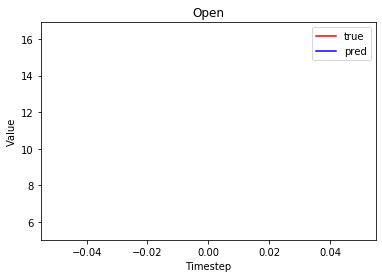

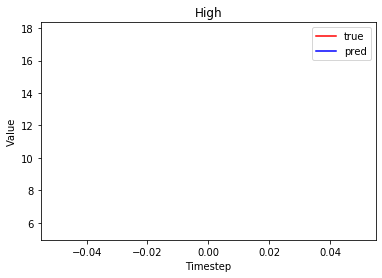

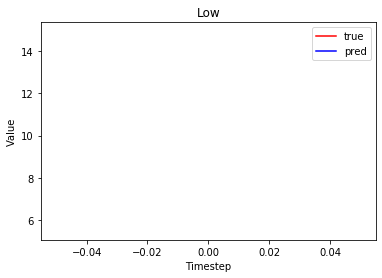

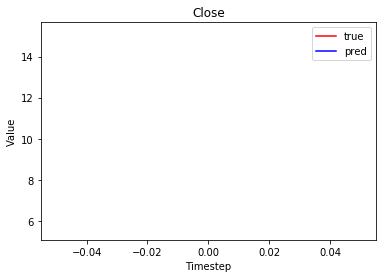

In [49]:
for i, columnName in enumerate(stock_df.columns):
    Plot.plotPredTrue(
        pred=pred[:, i],
        target=X[startPred + d + 1 : startPred + d + numPred + 1, i],
        title=columnName
    )